Loading funnel metrics...
Creating funnel visualization...


/var/folders/yh/d2w4676x467_vlxcvh44vs600000gn/T/ipykernel_11725/1208912888.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


Funnel visualization saved as funnel_analysis.png


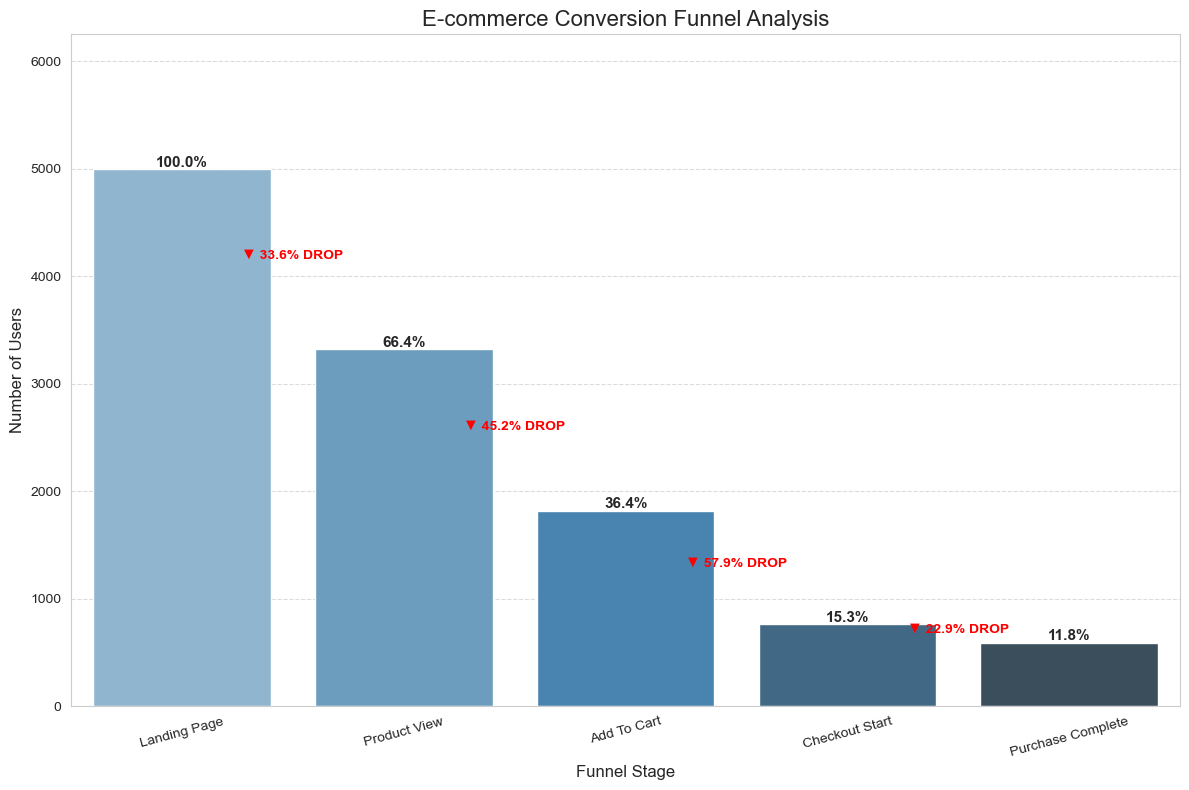

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


print("Loading funnel metrics...")
funnel_metrics = pd.read_csv('funnel_metrics.csv')


print("Creating funnel visualization...")
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
palette = sns.color_palette("Blues_d", len(funnel_metrics))


ax = sns.barplot(
    x='event', 
    y='users', 
    data=funnel_metrics,
    palette=palette
)


stage_labels = [s.replace('_', ' ').title() for s in funnel_metrics['event']]


for i, row in enumerate(funnel_metrics.itertuples()):
    ax.text(
        i, 
        row.users + 20, 
        f"{row.conversion_rate*100:.1f}%", 
        ha='center',
        fontweight='bold',
        fontsize=11
    )
    

for i in range(1, len(funnel_metrics)):
    prev = funnel_metrics.iloc[i-1]['users']
    curr = funnel_metrics.iloc[i]['users']
    drop_pct = funnel_metrics.iloc[i]['drop_off_pct']
    
    ax.text(
        i-0.5, 
        (prev + curr)/2, 
        f"▼ {drop_pct}% DROP", 
        ha='center',
        color='red',
        fontsize=10,
        fontweight='bold'
    )

plt.title('E-commerce Conversion Funnel Analysis', fontsize=16)
plt.xlabel('Funnel Stage', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(ticks=range(len(stage_labels)), labels=stage_labels, rotation=15)
plt.ylim(0, funnel_metrics['users'].max() * 1.25)


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.savefig('funnel_analysis.png', dpi=300)
print("Funnel visualization saved as funnel_analysis.png")
plt.show()